# Realtor.com Dataset:

## Business Case:

This dataset can be used to understand historical trends in US Housing data which can be leveraged to project future pricing. Further, the dataset could be used to compare a house which is for sale with what the market is pricing comparable sales too. This allows homeowners and investors to make more educated decisions with regards to real estate purchases.

USA Real Estate Dataset  is a 12 feature 900,000+ entry dataset of the Real Estate transactions and the properties on the market for various markets across the United States. The dataset is collected from a weekly web scrape of the Realtor.com website which is one of the US’ most popular provider of real estate data and has historical data going back to 1980s.

The business model of a real estate flipper is to purchase a property which is in a below market state, renovate that property, and then sell that property at a price which covers the initial purchase price and renovations. For this business model to succeed, the flipper needs to have an accurate After Repair Value (ARV) which is the fair market value of the property when the repairs are completed. To get the ARV, the flipper needs to project both what the fair market value of the house if it were repaired and the way in which the market will change between now and the time in which renovation finishes. Due to the locality of the real estate market, trends in the national housing market cannot accurately indicate what will happen to the value of houses in different price ranges and markets. As a result, to get a good indication of ARV comparison with comparable sales must be conducted. Our dataset allows for a programmatic determination of ARV by using comparable sales and by finding market trends amongst those sales.



### Importing Relevant Libraries:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [40]:
df = pd.read_csv("realtor-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


## Understanding the data:

In [41]:
df.head(10)

status     price  bed  bath  acre_lot  \
0  for_sale  105000.0  3.0   2.0      0.12   
1  for_sale   80000.0  4.0   2.0      0.08   
2  for_sale   67000.0  2.0   1.0      0.15   
3  for_sale  145000.0  4.0   2.0      0.10   
4  for_sale   65000.0  6.0   2.0      0.05   
5  for_sale  179000.0  4.0   3.0      0.46   
6  for_sale   50000.0  3.0   1.0      0.20   
7  for_sale   71600.0  3.0   2.0      0.08   
8  for_sale  100000.0  2.0   1.0      0.09   
9  for_sale  300000.0  5.0   3.0      7.46   

                                        full_address  \
0  Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601   
1            Km 78 9 Carr # 135, Adjuntas, PR, 00601   
2            556G 556-G 16 St, Juana Diaz, PR, 00795   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...   
4                    14 Navarro, Mayaguez, PR, 00680   
5  Bo Calabazas San Sebastian, San Sebastian, PR,...   
6                        49.1 140, Ciales, PR, 00639   
7                          3467 St, Ponce, PR, 00731   
8                  230 Rio De Vida, Ponce, PR, 00730   
9  Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...   

                                          street           city        state  \
0                   Sector Yahuecas Titulo # V84       Adjuntas  Puerto Rico   
1                             Km 78 9 Carr # 135       Adjuntas  Puerto Rico   
2                               556G 556-G 16 St     Juana Diaz  Puerto Rico   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce          Ponce  Puerto Rico   
4                                     14 Navarro       Mayaguez  Puerto Rico   
5                     Bo Calabazas San Sebastian  San Sebastian  Puerto Rico   
6                                       49.1 140         Ciales  Puerto Rico   
7                                        3467 St          Ponce  Puerto Rico   
8                                230 Rio De Vida          Ponce  Puerto Rico   
9              Pr 120 Bo Maravilla Sur K M # 335     Las Marias  Puerto Rico   

   zip_code  house_size sold_date  
0     601.0       920.0       NaN  
1     601.0      1527.0       NaN  
2     795.0       748.0       NaN  
3     731.0      1800.0       NaN  
4     680.0         NaN       NaN  
5     612.0      2520.0       NaN  
6     639.0      2040.0       NaN  
7     731.0      1050.0       NaN  
8     730.0      1092.0       NaN  
9     670.0      5403.0       NaN

TODO For each of the following:

appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.

Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).


### status: Saaketh

The status feature tells whether the given listing was for_sale or ready_to_build. This feature should be one-hot encoded. Because there are only two values for status, we will only the ready_to_build column. After the transformation, the status column will be replaced with a read_to_build column. There are no missing values.

In [42]:
df.status.value_counts()

for_sale          921528
ready_to_build      1631
Name: status, dtype: int64

Only 1,631 out of the 923,159 listings were labeled as ready_to_build

OneHotEncoding the ready_to_build column

In [43]:
df["ready_to_build"] = pd.get_dummies(df.status).ready_to_build
df.drop(columns=["status"], inplace=True)

### price: Ray

In [44]:
sns.histplot(data=df, x="price", kde=True, bins=50000,kde_kws={'clip' : (0, 1500000)})
plt.xlim(0, 1500000)

(0.0, 1500000.0)

Error in callback <function flush_figures at 0x178b775b0> (for post_execute):


KeyboardInterrupt: 

### bed: Vedant
#The bed column gives a count of the number of bedrooms in a given property, the value is an integer but is stored as a float in pandas, I have a suspicion that this means there are some missing values

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           923088 non-null  float64
 1   bed             791456 non-null  float64
 2   bath            807967 non-null  float64
 3   acre_lot        649536 non-null  float64
 4   full_address    923159 non-null  object 
 5   street          921021 non-null  object 
 6   city            923085 non-null  object 
 7   state           923159 non-null  object 
 8   zip_code        922954 non-null  float64
 9   house_size      625316 non-null  float64
 10  sold_date       456396 non-null  object 
 11  ready_to_build  923159 non-null  uint8  
dtypes: float64(6), object(5), uint8(1)
memory usage: 78.4+ MB


Text(0.5, 1.0, 'Sorted')

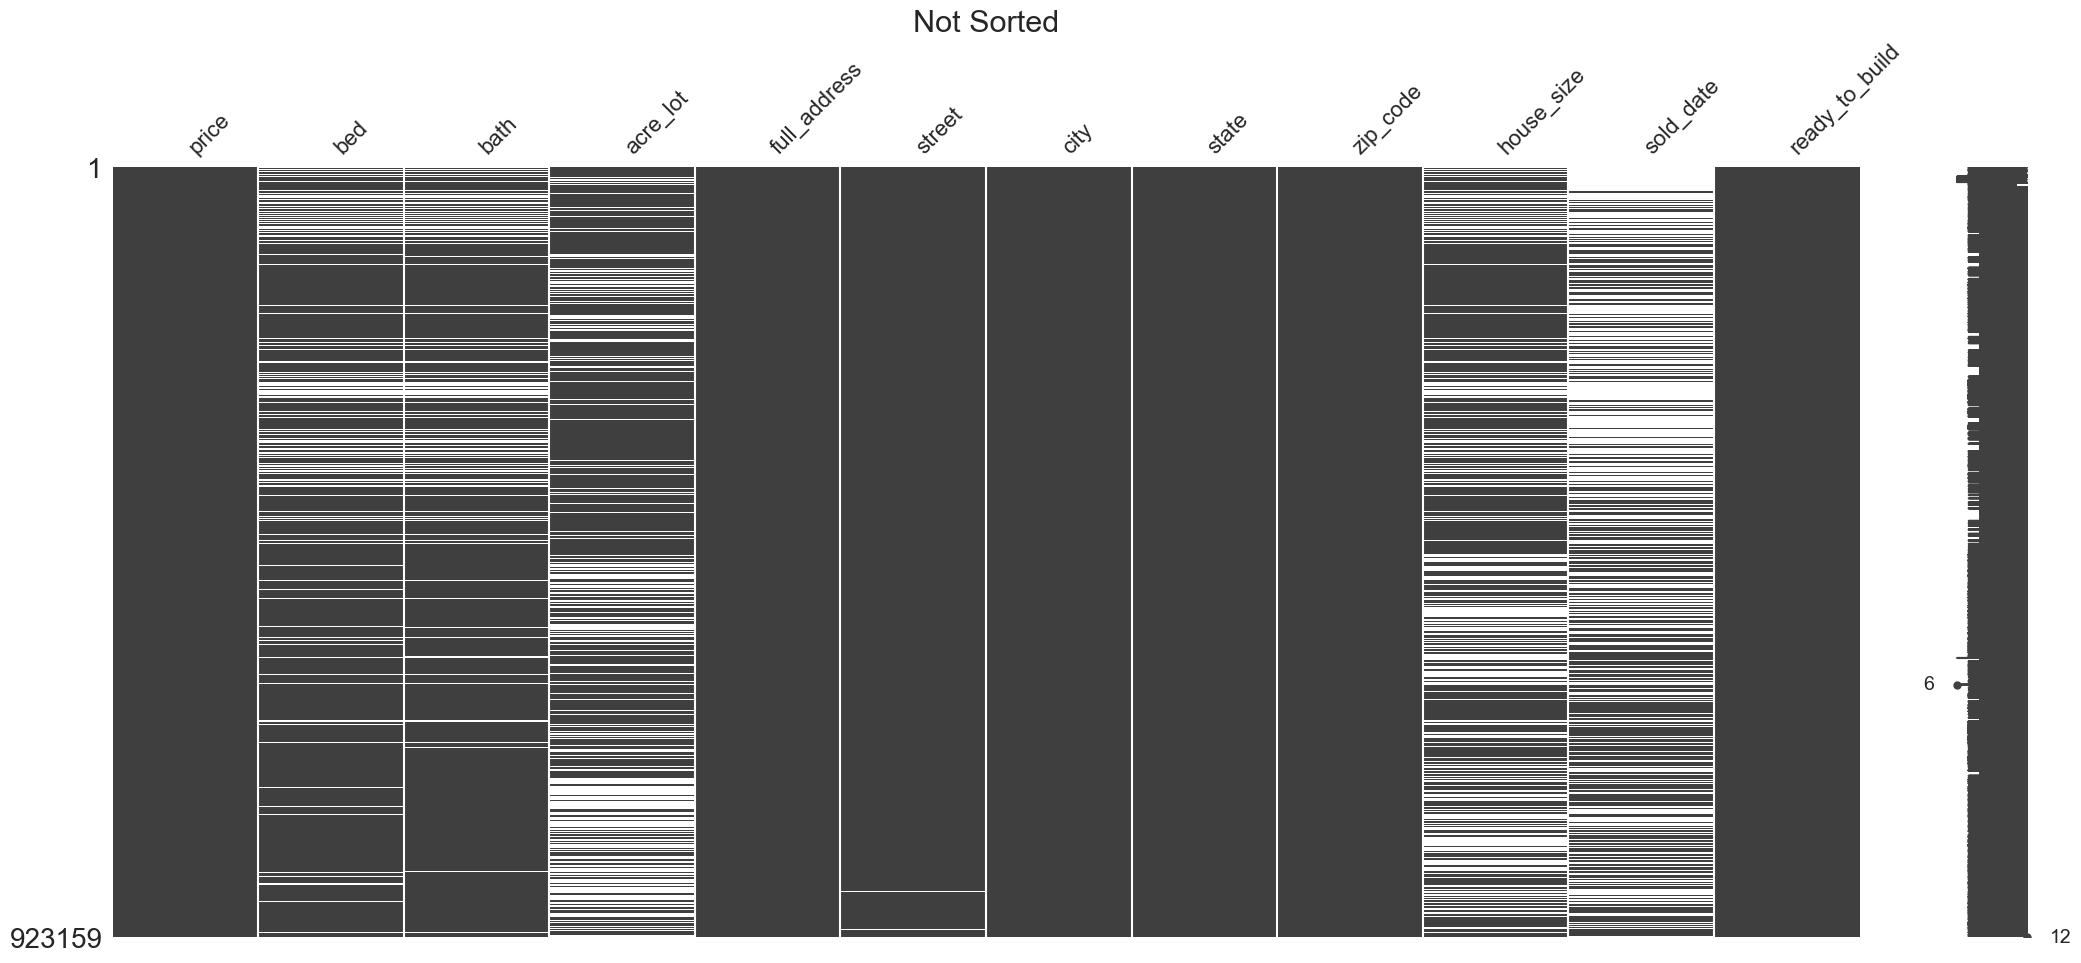

<Figure size 640x480 with 0 Axes>

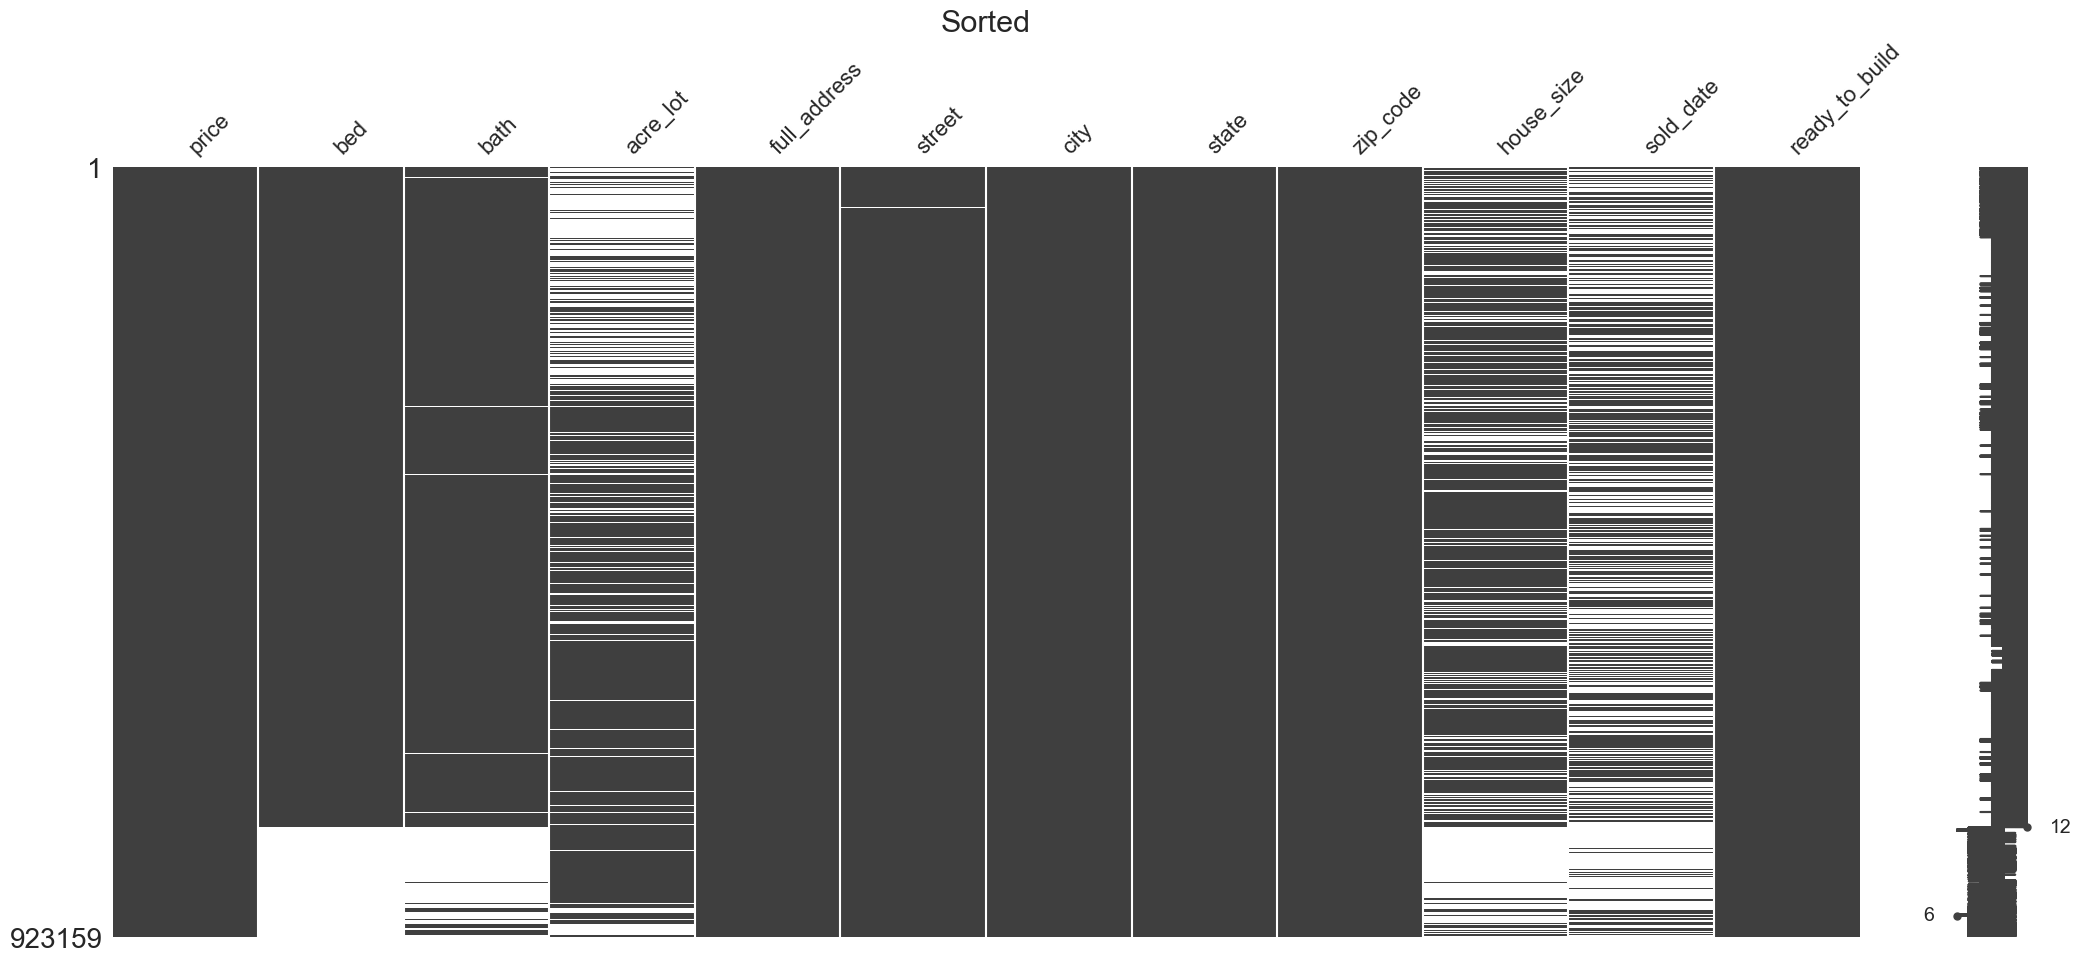

In [46]:
#As suspected, we have a lot of missing values, over 12000, but this is only about 13% of our dataset so we can just drop the missing rows, as there is stilla a lot of useful information in this feature.
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# External package: conda install missingno
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["bed"]))
plt.title("Sorted",fontsize=22)

From this visual, it seems that the missing values of bed are also highly indicative of missing values in bath(# bathrooms), house size and sold date. That honestly doesn't give much confidence that imputation would actually work super well with this dataset for either of those features (as they are hightly correlated to each other) so lets just drop the missing columns of bed.

In [48]:
df.dropna(subset=['bed'], inplace=True)

#

### bath: Saaketh

This variable describes the number of bathrooms in the property. The data is in Integer form.

In [ ]:
txt = "{percent:.2f}% of the data is missing"
print(txt.format(percent=(df.bath.isna().sum()*100) / len(df)))

Because 12% of the data is missing we can impute the bed variable with nearest K nearest neighbors imputation

### acre_lot

#### Overview
The acre_lot feature indicates the lot size of the property being sold. This feature is different from the house size metric as that measures the size of the property itself rather than the land around it. While this difference is often negligable in urban areas, for rural properties, the Lot Size of the land often drives the value of the property more than the value of the dwelling.

#### Missing Values


In [ ]:
df.acre_lot.isna().sum()/ len(df)

In [ ]:
sns.histplot(data=df[df["acre_lot"].isna()], x="house_size", kde=True, bins=1000,kde_kws={'clip' : (0, 5000)})
plt.xlim(0, 5000)

In [ ]:
sns.histplot(data=df, x="house_size", kde=True, bins=10000,kde_kws={'clip' : (0, 5000)})
plt.xlim(0, 5000)

# full_address: Vedant

Because we already have zip code and other useful geolocation data, the full address isn't all that relevant to us, as the full address itself doesn't inherently provide more information to us than zip code, unless we wanted to somehow map the addresses to precise places via a gps, which would likely be exrtremely expensive and beyond the scope of what we can realistically do, given our current limitations.

In [ ]:
#dropping the address feature
df.drop(labels=['full_address'], axis=1, inplace=True)

In [ ]:
df.street.isna().sum()

In [ ]:
df.street.isna().sum()

### city: Ray

In [ ]:
### state: Vedant

In [ ]:
df.state.isna().sum()

There are no missing values for state and it is useful for the purposes of mapping, dicretizing the data by state, etc.

In [ ]:
df.state.value_counts()

In [ ]:
#dropping virgin islands because it only has 6 instances and is therefore not all that useful
df = df[df.state.isin(["Virgin Islands"]) == False]

### zip_code: Saaketh

In the US, a Zip Code is 5 digits. Any entries in the zip code feature that have less than 5 digits have leading 0s in their official zipcode.

In [ ]:
df.zip_code.min(), df.zip_code.max()

In [ ]:
df.zip_code.isna().sum(), (df.zip_code.isna().sum()*100)/len(df)

There are only 205 NaN values for the zip_code feature. These account for ~0.02% of the dataset. For this reason, we will eliminate the NaN values. If we had more NaN values, we could impute by taking the mode zipcode grouped by city. This is using the logic that a single zipcode covers most of the city.

In [ ]:
df.dropna(subset=["zip_code"], inplace=True)

TODO if bored: Encode this

Sold date has about 362,000 missing values, isn't really something we can impute due to the fact that there are a very high number of sold dates in our dataset and there is no real notion that the nearest neaighbords across some feature will have similar dates due to a missing one. However, this feature is very important for us in terms of understanding shifts over time, so we will just drop rows with missing values.

In [ ]:
df["sold_date"] = pd.to_datetime(df["sold_date"])
df.sold_date.isna().sum()
df.dropna(subset=['sold_date'], inplace=True)

In [ ]:
df["sold_date"] = pd.to_datetime(df["sold_date"])

## Data Visualization:

TODO: Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data
Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical.


We will each do 2 plots

Question ideas:


How do house prices vary by location?
How do house prices vary by size / features of the house?
How have house prices changed over time?
How have house features changed over time? (ie have bedrooms / bathrooms increased in number, sqft increased or decreased, ect.)

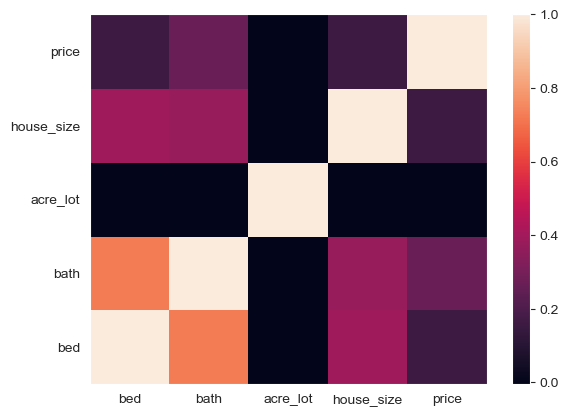

In [49]:
# plot the correlation matrix
vars_to_use = ['bed', 'bath', 'acre_lot', 'house_size', 'price'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

### How do house prices vary by location? Saaketh

In [ ]:
import plotly.express as px
from urllib.request import urlopen
import json
import datetime as dt

I am getting the values from 2011 onwards in order to keep the prices relatively recent.

In [ ]:
df['sold_date'] = pd.to_datetime(df["sold_date"])

In [ ]:
states_df = df[df.sold_date > dt.datetime(2011,1,1)].groupby("state").mean()

In [ ]:
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    states = json.load(response)

In [ ]:

states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
def label_state_id(row):
    try:
        state_id = states_to_number[row.name]
    except:
        return 0
    return state_id
states_df["state_id"] = states_df.apply(label_state_id, axis=1)

In [ ]:
px.choropleth(states_df,
              locations= states_df.state_id,
              geojson=states,
              color='price',
              color_continuous_scale="Viridis",
              range_color=(300000, 1500000),
              scope="usa",
              labels={'unemp':'unemployment rate'}
              )

In [ ]:
recent_sold_homes = df[df.sold_date > dt.datetime(2011,1,1)]

In [ ]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state")
fig.show()

### Question 2: Ray
In what ways is the housing market localized?

In [32]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state")
fig.show()

### Question 2: Ray
In what ways is the housing market localized?